In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style, rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.decomposition import NMF, PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_validate
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import xgboost.sklearn as xgb
import xgboost as x
import gensim
import seaborn as sns
import pickle
import nlp_pipeline as nlp
# %load_ext autoreload
%autoreload 2
style.use('ggplot')
rcParams['font.size'] = 14
rcParams['legend.fontsize'] = 'small'
rcParams['figure.titlesize'] = 'large'

Hello


In [16]:
df = pd.read_csv('../data/train.csv')
df_5class = df[df['Labels'] != 4].copy()
y = df_5class['Labels']
df_5class

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"
...,...,...,...
10234,2,"Under the ruling of the Supreme Court, any lob...","corporations,elections"
10235,3,There are a larger number of shark attacks in ...,"animals,elections"
10236,3,Democrats have now become the party of the [At...,elections
10237,2,Says an alternative to Social Security that op...,"retirement,social-security"


In [ ]:
corpus

In [17]:
corpus = df_5class['Text'].tolist()
bow = [nlp.extract_bow_from_raw_text(row) for row in corpus]
bow[:10]

[['say',
  'the',
  'annies',
  'list',
  'political',
  'group',
  'support',
  'third-trimester',
  'abortion',
  'on',
  'demand'],
 ['when',
  'did',
  'the',
  'decline',
  'of',
  'coal',
  'start',
  'it',
  'started',
  'when',
  'natural',
  'gas',
  'took',
  'off',
  'that',
  'started',
  'to',
  'begin',
  'in',
  'president',
  'george',
  'w.',
  'bush',
  'administration'],
 ['hillary',
  'clinton',
  'agrees',
  'with',
  'john',
  'mccain',
  '``',
  'by',
  'voting',
  'to',
  'give',
  'george',
  'bush',
  'the',
  'benefit',
  'of',
  'the',
  'doubt',
  'on',
  'iran',
  "''"],
 ['health',
  'care',
  'reform',
  'legislation',
  'is',
  'likely',
  'to',
  'mandate',
  'free',
  'sex',
  'change',
  'surgery'],
 ['the',
  'economic',
  'turnaround',
  'started',
  'at',
  'the',
  'end',
  'of',
  'my',
  'term'],
 ['the',
  'chicago',
  'bear',
  'have',
  'had',
  'more',
  'starting',
  'quarterback',
  'in',
  'the',
  'last',
  '10',
  'year',
  'than',
  '

In [ ]:
size = 100

model = gensim.models.Word2Vec(bow, min_count = 1,  
                              size = size, window = 5, seed=2) 

In [ ]:
model.wv.vocab

In [ ]:
model.wv['health']

In [ ]:
corpus_vec = np.zeros((len(bow),size))

for i, row in enumerate(bow):
    row_vec = np.zeros(size)
    for word in row:
        row_vec += model.wv[word]
    
    corpus_vec[i] = row_vec

In [ ]:
min(len(ele) for ele in bow), max(len(ele) for ele in bow) 

In [ ]:
lst = [len(ele) for ele in bow]
np.median(lst)

In [ ]:
corpus_vec


In [4]:
scores = []

bow_train, bow_test, y_train, y_test = train_test_split(bow, y,
                                                            test_size=0.2,
                                                            stratify=y,
                                                            random_state=42)
# sizes = range(300, 401, 10)
# for size in sizes:
#     vec_train, vec_test = nlp.word_embed(bow_train, bow_test, size)
#     rf = RandomForestClassifier().fit(vec_train, y_train)
#     scores.append(f1_score(y_test, rf.predict(vec_test), average='weighted'))

In [ ]:
fig, ax = plt.subplots()

ax.plot(sizes, scores)
ax.set_xlabel('Sizes')
ax.set_ylabel('Test Score')
ax.set_title("RF scores by Vector Sizes")
plt.savefig('../images/wv_size_tuning2.png');

In [ ]:
scores

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

vec_train, vec_test = nlp.word_embed(bow_train, bow_test, 50)


vec_train.shape
cosim = cosine_similarity(vec_train[1435].reshape(1,-1), vec_train)

np.min(cosim)



0.7157573637461565

In [6]:
np.argmin(cosim)

6216

In [7]:
print(bow_train[1435])
print(bow_train[np.argmin(cosim)])

['say', 'rob', 'portman', 'even', 'voted', 'to', 'allow', 'people', 'on', 'the', 'terrorism', 'watch', 'list', 'to', 'buy', 'gun']
['texas', 'added', 'more', 'job', 'in', '2010', 'than', 'any', 'other', 'state']


In [8]:
cosim.shape

(1, 7520)

(array([  1.,   0.,   4.,   1.,   2.,   7.,   7.,   4.,   8.,   2.,  16.,
          6.,   9.,  10.,  15.,  17.,  30.,  29.,  46.,  40.,  42.,  53.,
         66.,  71.,  65.,  84.,  89., 104.,  87., 115., 129., 140., 145.,
        171., 198., 226., 212., 205., 285., 289., 334., 356., 356., 410.,
        446., 495., 466., 550., 609., 468.]),
 array([0.71575736, 0.72144222, 0.72712707, 0.73281192, 0.73849677,
        0.74418163, 0.74986648, 0.75555133, 0.76123619, 0.76692104,
        0.77260589, 0.77829074, 0.7839756 , 0.78966045, 0.7953453 ,
        0.80103015, 0.80671501, 0.81239986, 0.81808471, 0.82376957,
        0.82945442, 0.83513927, 0.84082412, 0.84650898, 0.85219383,
        0.85787868, 0.86356353, 0.86924839, 0.87493324, 0.88061809,
        0.88630295, 0.8919878 , 0.89767265, 0.9033575 , 0.90904236,
        0.91472721, 0.92041206, 0.92609691, 0.93178177, 0.93746662,
        0.94315147, 0.94883633, 0.95452118, 0.96020603, 0.96589088,
        0.97157574, 0.97726059, 0.98294544, 0.

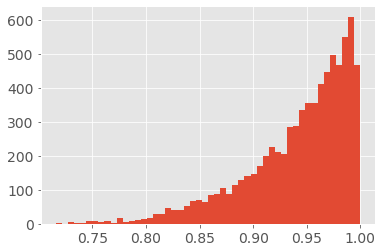

In [9]:
plt.hist(cosim.flatten(), bins=50)

In [ ]:
vec_train.shape
cosim = cosine_similarity(vec_train[4781].reshape(1,-1), vec_train)

np.min(cosim)

print(bow_train[4781])
print(bow_train[np.argmin(cosim)])


In [ ]:
np.min(cosim)

In [ ]:
cosim

In [ ]:
np.argwhere(cosim.flatten() < 0.50)

In [12]:
print(bow_train[393])
print(bow_train[404])
print(bow_train[6134])

['what', 'they', 'will', 'do', 'is', 'socialized', 'medicine']
['on', 'his', 'definition', 'of', 'taker', 'and', 'maker']
['on', 'torture']


In [ ]:
len(bow_train), len(bow_test), len(y_train), len(y_test)

In [10]:
vec_train

array([[ 0.12669568,  0.09158998,  0.06508244, ...,  0.0075    ,
        -0.02861756, -0.00733335],
       [ 0.04781712,  0.02683211,  0.01572067, ...,  0.00882848,
        -0.00612264, -0.01270581],
       [ 0.13529234,  0.05345731, -0.00427828, ...,  0.02890855,
         0.02393914, -0.01769458],
       ...,
       [ 0.05508591,  0.09468066,  0.15406227, ..., -0.05083873,
        -0.14477847, -0.04628928],
       [ 0.07893225,  0.08227078,  0.11224994, ..., -0.03870117,
        -0.11320939, -0.06138254],
       [ 0.11790754,  0.06566706,  0.03535857, ...,  0.01544638,
        -0.0090889 , -0.00781493]])

In [ ]:
vec_train.shape
cosim = cosine_similarity(vec_train[393].reshape(1,-1), vec_train)

np.min(cosim)

print(bow_train[393])
print(bow_train[np.argmin(cosim)])


In [ ]:
np.min(cosim)

In [ ]:
cosim

In [11]:
vec_train[393]

array([ 0.15387779,  0.09099179,  0.01542422,  0.04915265, -0.00807337,
       -0.0125291 ,  0.22850461,  0.08438936, -0.10457438, -0.18082794,
       -0.03102874,  0.12956289, -0.037223  ,  0.01191128, -0.19246735,
        0.01682936, -0.11098184,  0.18198082, -0.14388689,  0.05905703,
        0.0049264 ,  0.21443357, -0.13793729,  0.15499544,  0.05502434,
       -0.19111331, -0.11518024, -0.14780354, -0.01914526, -0.16740444,
        0.08968242, -0.04792315,  0.0226531 ,  0.02685931,  0.21508262,
       -0.03750409,  0.06123308,  0.03428072, -0.16154924, -0.00123334,
       -0.08547694, -0.14311709,  0.04892588,  0.17936738, -0.12956878,
       -0.07732314,  0.00796394,  0.15045984,  0.18928983,  0.13921283,
       -0.14779373,  0.13582174, -0.01305655,  0.05842284, -0.05630093,
       -0.05325761,  0.29250469, -0.04287539,  0.09056727, -0.12749644,
       -0.01932551,  0.053514  ,  0.07148507, -0.26103665, -0.03652507,
       -0.09125883,  0.01611097, -0.04010549,  0.20528275, -0.05

In [ ]:
vec_train[4781]